In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## Genres
#### Goals

- Get list of genres for each streaming services' TV shows
- Create columns for each genre, 1 indicating it is present and 0 it is not
- Calculate percentage of genres for each streaming service

We will repeat the same process as on 05_genres notebook.

----

### 1. Hulu

#### i. Import data

In [2]:
hulu = pd.read_pickle("Data_Hulu_Disney/hulu_final_clean.pkl")

In [3]:
hulu.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Rick and Morty,2013,18.0,9.2,tt2861424,tvSeries,Rick and Morty,Rick and Morty,2013.0,2013.0,23.0,"Adventure,Animation,Comedy"
1,Fargo,2014,18.0,8.9,tt2802850,tvSeries,Fargo,Fargo,2014.0,2014.0,53.0,"Crime,Drama,Thriller"
2,Vikings,2013,18.0,8.5,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
3,Brooklyn Nine-Nine,2013,16.0,8.4,tt2467372,tvSeries,Brooklyn Nine-Nine,Brooklyn Nine-Nine,2013.0,2013.0,22.0,"Comedy,Crime"
4,Community,2009,7.0,8.5,tt1439629,tvSeries,Community,Community,2009.0,2009.0,22.0,Comedy


#### ii. Check null values for genres column

In [4]:
hulu[hulu["genres"].isna()]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


In [5]:
hulu[hulu["genres"] == "\\N"]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
191,Genius,2017,7.0,8.4,tt10081440,tvSeries,Genius,Genius,2017.0,2017.0,NaN,\N
630,Hunter,1984,7.0,6.8,tt6921036,tvSeries,Hunter,Hunter,1984.0,1984.0,NaN,\N
1058,Hungry Henry,2014,NaN,9.5,tt6964618,tvSeries,Hungry Henry,Hungry Henry,2014.0,2014.0,11.0,\N
1091,New York Goes to Work,2009,NaN,4.9,tt1429423,tvSeries,New York Goes to Work,New York Goes to Work,2009.0,2009.0,NaN,\N
1103,A New Leaf,2019,NaN,3.1,tt11006714,tvSeries,A New Leaf,A New Leaf,2019.0,2019.0,NaN,\N
1121,Tiny Beats,2013,NaN,NaN,tt6917396,tvSeries,Tiny Beats,Tiny Beats,2013.0,2013.0,10.0,\N
1136,Egg Birds,2014,NaN,NaN,tt6951600,tvSeries,Egg Birds,Egg Birds,2014.0,2014.0,10.0,\N
1144,Paint Me a Story,2014,NaN,NaN,tt6956946,tvSeries,Paint Me a Story,Paint Me a Story,2014.0,2014.0,16.0,\N
1145,Kenny & Goorie,2011,NaN,NaN,tt6963280,tvSeries,Kenny & Goorie,Kenny & Goorie,2011.0,2011.0,11.0,\N
1148,ABC News Specials,2010,NaN,6.0,tt6963192,tvSeries,ABC News Specials,ABC News Specials,2010.0,2010.0,59.0,\N


We will remove values containing "\N".

#### iii. Create new data frame

In [6]:
hulu_genres = hulu[hulu["genres"] != "\\N"]

hulu_genres = hulu_genres[["show", "genres"]].reset_index(drop=True)

hulu_genres.head()

,show,genres
0,Rick and Morty,"Adventure,Animation,Comedy"
1,Fargo,"Crime,Drama,Thriller"
2,Vikings,"Action,Adventure,Drama"
3,Brooklyn Nine-Nine,"Comedy,Crime"
4,Community,Comedy


#### iv. Obtain list of total genres

In [7]:
def total_genres(df_genres):
    genres = [genre.split(",") for genre in df_genres]
    unique_genres = []

    for i in genres:
        for j in i:
            if j not in unique_genres:
                unique_genres.append(j)
    
    return unique_genres

In [8]:
unique_genres_hulu = total_genres(hulu_genres["genres"])

unique_genres_hulu

['Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Fantasy',
 'Romance',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Sport',
 'Family',
 'Music',
 'Game-Show',
 'Reality-TV',
 'History',
 'Musical',
 'Biography',
 'War',
 'Documentary',
 'Talk-Show',
 'Western',
 'News',
 'Short']

In [9]:
len(unique_genres_hulu)

26

We have 26 unique genres for Hulu's TV shows, same as for Netflix and Amazon.

#### v. Create columns for each genre

In [10]:
def genre_columns(df, unique_genres):
    
    for genre in unique_genres:
        df[genre] = 0
        
    for genre in unique_genres:
        df[genre] = df["genres"].str.contains(genre).astype(int)
        
    return df

In [11]:
hulu_genres = genre_columns(hulu_genres, unique_genres_hulu)

hulu_genres.head()

,show,genres,Adventure,Animation,Comedy,Crime,Drama,Thriller,Action,Fantasy,Romance,Sci-Fi,Mystery,Horror,Sport,Family,Music,Game-Show,Reality-TV,History,Musical,Biography,War,Documentary,Talk-Show,Western,News,Short
0,Rick and Morty,"Adventure,Animation,Comedy",1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fargo,"Crime,Drama,Thriller",0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Vikings,"Action,Adventure,Drama",1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Brooklyn Nine-Nine,"Comedy,Crime",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Community,Comedy,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# hulu_genres.to_pickle("Data_Hulu_Disney/hulu_genres.pkl")

#### vi. Calculate percentage for each genre

In [13]:
def genre_ratio(df, unique_genres):
    
    genre_ratio = (pd.DataFrame(df[unique_genres].sum().sort_values(ascending=False))
                       .reset_index()
                       .rename(columns={"index":"genre", 0:"frequency"}))
    
    genre_ratio["ratio"] = round((genre_ratio["frequency"] / len(df)), 4)
    
    genre_ratio["percentage"] = genre_ratio["ratio"]*100
    
    return genre_ratio

In [14]:
hulu_genre_ratio = genre_ratio(hulu_genres, unique_genres_hulu)

In [15]:
hulu_genre_ratio

,genre,frequency,ratio,percentage
0,Comedy,506,0.3536,35.36
1,Drama,475,0.3319,33.19
2,Animation,313,0.2187,21.87
3,Reality-TV,239,0.1670,16.70
4,Action,230,0.1607,16.07
5,Crime,179,0.1251,12.51
6,Adventure,179,0.1251,12.51
7,Documentary,115,0.0804,8.04
8,Family,104,0.0727,7.27
9,Mystery,96,0.0671,6.71


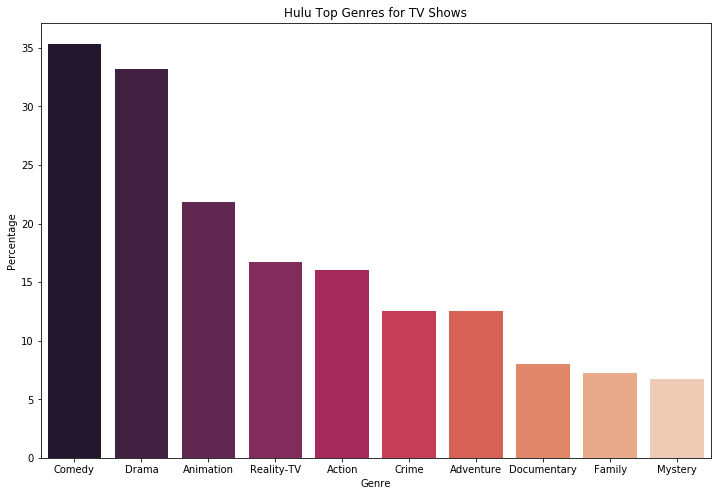

In [16]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=hulu_genre_ratio.head(10),
           x="genre",
           y="percentage",
           palette="rocket")

ax.set_title("Hulu Top Genres for TV Shows")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage");

From the new data frame we can conclude that Comedy and Drama are the most common genres for Hulu's TV shows, same for the other streaming services, being present in 35 and 33%, respectively, of all TV shows. We have Animation, Reality-TV, Action, Crime, and Adventure between 20 and 10% of all TV shows.

#### vii. Export data

In [17]:
# hulu_genre_ratio.to_pickle("Data_Hulu_Disney/hulu_genres_ratio.pkl")

-----

### 2. Disney+

#### i. Import data

In [18]:
disney = pd.read_pickle("Data_Hulu_Disney/disney_final_clean.pkl")

In [19]:
disney.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Mandalorian,2019,7.0,8.7,tt8111088,tvSeries,The Mandalorian,The Mandalorian,2019.0,2019.0,30.0,"Action,Adventure,Sci-Fi"
1,The Simpsons,1989,7.0,8.7,tt0096697,tvSeries,The Simpsons,The Simpsons,1989.0,1989.0,22.0,"Animation,Comedy"
2,Gravity Falls,2012,7.0,8.9,tt1865718,tvSeries,Gravity Falls,Gravity Falls,2012.0,2012.0,23.0,"Action,Adventure,Animation"
3,Star Wars: The Clone Wars,2008,7.0,8.2,tt0458290,tvSeries,Star Wars: The Clone Wars,Star Wars: The Clone Wars,2008.0,2008.0,23.0,"Action,Adventure,Animation"
4,DuckTales,2017,7.0,8.2,tt5531466,tvSeries,DuckTales,DuckTales,2017.0,2017.0,21.0,"Action,Adventure,Animation"


#### ii. Check null values for genres column


In [20]:
disney[disney["genres"].isna()]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres


In [21]:
disney[disney["genres"] == "\\N"]

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
114,Shop Class,2020,0.0,7.1,tt10225108,tvSeries,Shop Class,Shop Class,2020.0,2020.0,NaN,\N
131,Secrets of the Zoo: Tampa,2020,NaN,8.3,tt11708046,tvSeries,Secrets of the Zoo: Tampa,Secrets of the Zoo: Tampa,2020.0,2020.0,NaN,\N
133,Rocky Mountain Animal Rescue,2018,NaN,7.8,tt9395780,tvSeries,Rocky Mountain Animal Rescue,Rocky Mountain Animal Rescue,2018.0,2018.0,NaN,\N
137,United States of Animals,2016,NaN,NaN,tt6126926,tvSeries,United States of Animals,United States of Animals,2016.0,2016.0,22.0,\N
148,Be our Chef,2020,0.0,6.8,tt10219416,tvSeries,Be Our Chef,Be Our Chef,2020.0,2020.0,NaN,\N


#### iii. Create new data frame

In [22]:
disney_genres = disney[disney["genres"] != "\\N"]

disney_genres = disney_genres[["show", "genres"]].reset_index(drop=True)

disney_genres.head()

,show,genres
0,The Mandalorian,"Action,Adventure,Sci-Fi"
1,The Simpsons,"Animation,Comedy"
2,Gravity Falls,"Action,Adventure,Animation"
3,Star Wars: The Clone Wars,"Action,Adventure,Animation"
4,DuckTales,"Action,Adventure,Animation"


#### iv. Obtain list of total genres


In [23]:
unique_genres_disney = total_genres(disney_genres["genres"])

unique_genres_disney

['Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Comedy',
 'Family',
 'Documentary',
 'Drama',
 'Fantasy',
 'Reality-TV',
 'Music',
 'Romance',
 'Mystery',
 'Musical']

In [24]:
len(unique_genres_disney)

14

We have 14 unique genres for Disney+'s TV shows.

#### v. Create columns for each genre


In [25]:
disney_genres = genre_columns(disney_genres, unique_genres_disney)

disney_genres.head()

,show,genres,Action,Adventure,Sci-Fi,Animation,Comedy,Family,Documentary,Drama,Fantasy,Reality-TV,Music,Romance,Mystery,Musical
0,The Mandalorian,"Action,Adventure,Sci-Fi",1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,The Simpsons,"Animation,Comedy",0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,Gravity Falls,"Action,Adventure,Animation",1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,Star Wars: The Clone Wars,"Action,Adventure,Animation",1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,DuckTales,"Action,Adventure,Animation",1,1,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
# disney_genres.to_pickle("Data_Hulu_Disney/disney_genres.pkl")

#### vi. Calculate percentage for each genre

In [27]:
disney_genre_ratio = genre_ratio(disney_genres, unique_genres_disney)

disney_genre_ratio

,genre,frequency,ratio,percentage
0,Animation,72,0.4898,48.98
1,Comedy,65,0.4422,44.22
2,Adventure,63,0.4286,42.86
3,Family,51,0.3469,34.69
4,Action,45,0.3061,30.61
5,Documentary,20,0.1361,13.61
6,Reality-TV,17,0.1156,11.56
7,Drama,10,0.0680,6.80
8,Music,6,0.0408,4.08
9,Sci-Fi,6,0.0408,4.08


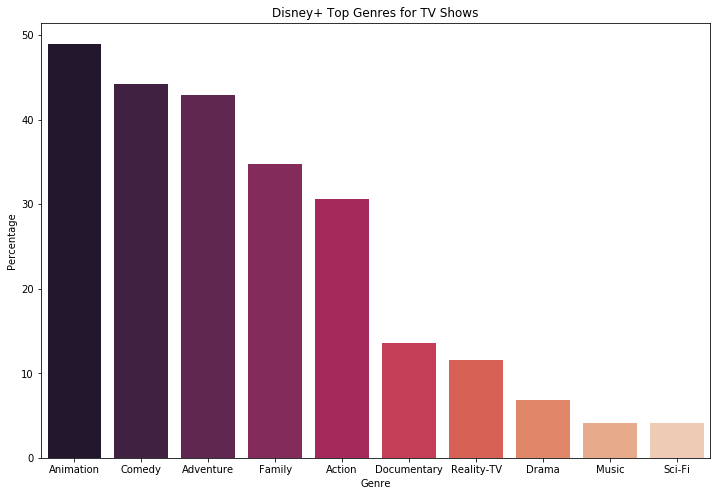

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data=disney_genre_ratio.head(10),
           x="genre",
           y="percentage",
           palette="rocket")

ax.set_title("Disney+ Top Genres for TV Shows")
ax.set_xlabel("Genre")
ax.set_ylabel("Percentage");

From the new data frame we can conclude that Animation, Comedy, and Adventure are the most common genres for Disney+'s TV shows, being present in 48, 44, and 42%, respectively, of all TV shows. We have Family, Action, Documnetary and Reality-TV between 20 and 10% of all TV shows.

#### vii. Export data

In [29]:
# disney_genre_ratio.to_pickle("Data_Hulu_Disney/disney_genres_ratio.pkl")

----

### 3. Comparison

- Netflix, Amazon, HBO and Hulu have Drama and Comedy as their top 2 genres, Hulu having Comedy as number one.
- All streaming services have Action and Adventure in their top 10 genres.
- Netflix, Amazon and Hulu seem to have very similar genre distributions for their top 10 genres, however, Hulu has Reality-TV in their top 4, different from the other two which have Reality-TV in their 8th and 9th place. Netflix also has Romance in its top 10, different than Amazon and Hulu, which they don't.
- HBO is different from the other streaming services, having on their top 10 Mystery, Sci-Fi, Thriller and Fantasy, while Amazon, Netflix and Hulu have Documentary, Animation, Family and Reality-TV in their top 10.
- Disney+ also stands out from the rest having Drama in 8th place and Music in its top 10 genres.

In [54]:
hulu_genres[hulu_genres["Reality-TV"] == 1].head(20)

,show,genres,Adventure,Animation,Comedy,Crime,Drama,Thriller,Action,Fantasy,Romance,Sci-Fi,Mystery,Horror,Sport,Family,Music,Game-Show,Reality-TV,History,Musical,Biography,War,Documentary,Talk-Show,Western,News,Short
68,RuPaul's Drag Race,"Game-Show,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
158,Survivor,"Adventure,Game-Show,Reality-TV",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
176,MythBusters,"Documentary,Mystery,Reality-TV",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
211,RuPaul's Drag Race All Stars,Reality-TV,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
228,Face Off,"Game-Show,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
231,Hell's Kitchen,"Game-Show,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
237,Shark Tank,"Family,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
241,Ghost Adventures,"Documentary,History,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0
275,Deadliest Catch,"Adventure,Documentary,Reality-TV",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
281,Top Chef,"Game-Show,Reality-TV",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
